In [1]:
### 행렬 데이터 처리 라이브러리(시리즈, 리스트, 튜플 데이터 형태를 따름)
import pandas as pd
### 시각화 라이브러리 (제공되는 데이터셋 있음)
import seaborn as sns
### 수치 데이터 처리 라이브러리 (배열 형태를 따름, 차원관리)
import numpy as np
### 시각화에 사용되는 기본 라이브러리
import matplotlib.pyplot as plt
### 시각화에 사용할 한글처리
from matplotlib import font_manager, rc
import platform
### Windows인 경우 가장 많이 사용하는 방식
plt.rc("font", family = "Malgun Gothic")

In [21]:
# 기간 및 국가별 휘발유 가격 csv 파일 읽어들이기
g = pd.read_csv('./국가별_유종별_가격/국가별_월별_보통휘발류_가격_세후.csv', encoding='euc-kr')

In [22]:
# 국가 컬럼의 값을 int타입으로 변경
for i in g.columns[1:]:
    g[i] = g[i].astype("int64")

In [23]:
# 기간 컬럼에서 연도와 월의 값을 추출하여 연도, 월 컬럼에 넣는다.
g['연도'] = g['기간'].str[:4]
g['월'] = g['기간'].str[5:7]

In [6]:
# 2019년 1월부터 2023년 5월까지 데이터를 g_new에 넣는다.
g_new = g.iloc[68:,:].reset_index(drop=True).copy()

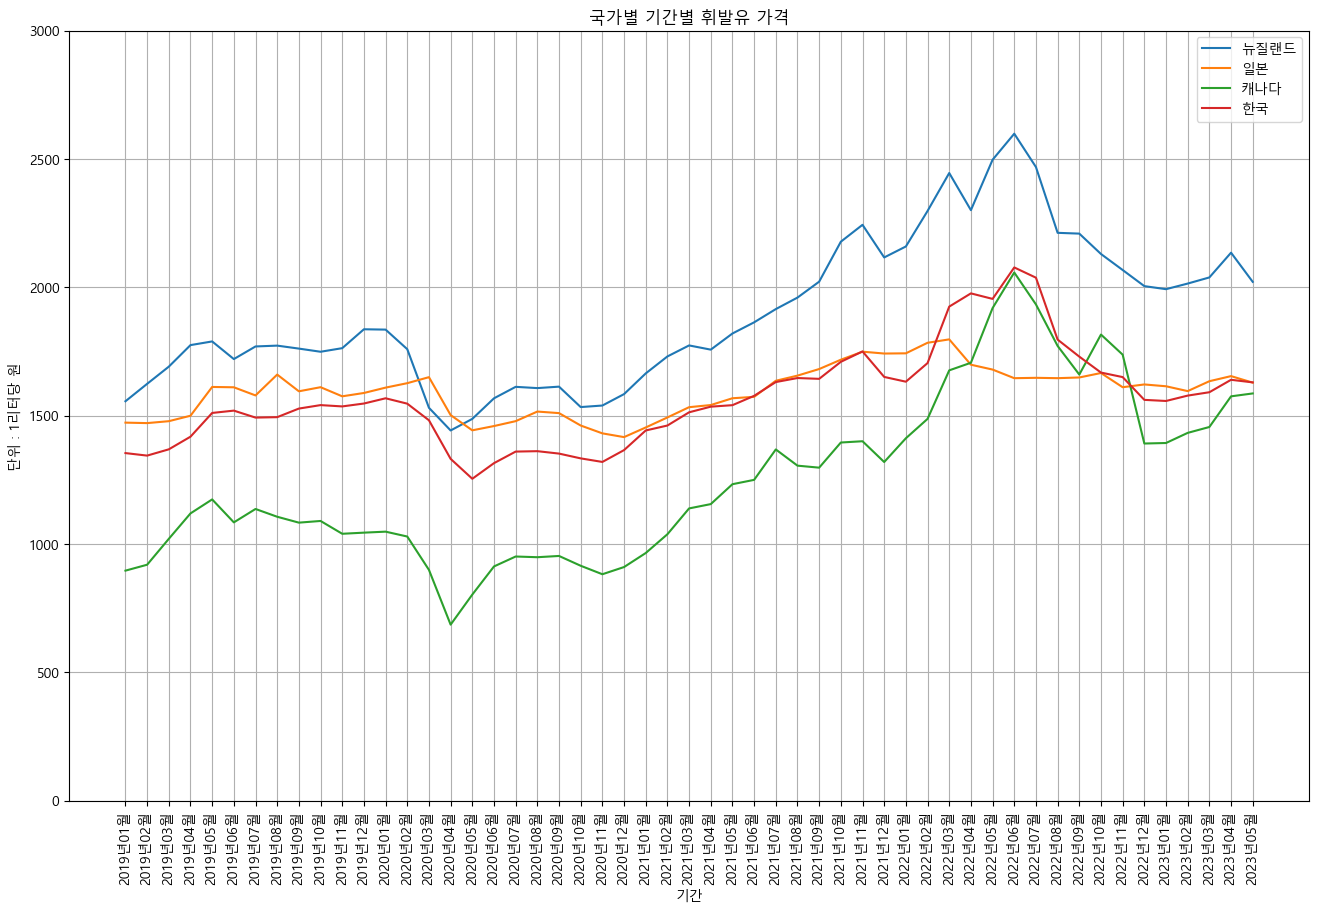

In [9]:
# 국가별 기간별 휘발유 가격 그래프

plt.figure(figsize=(16,10))
for i in g_new.columns[1:-2]: # g_new의 국가 컬럼만 for문으로 사용
    plt.plot(g_new['기간'],g_new[i]) # 기간을 x, 국가를 y로 지정하여 그래프 선 그래프 생성
plt.xticks(rotation=90) # x 값을 90도 회전
plt.grid() 
plt.title('국가별 기간별 휘발유 가격')
plt.xlabel('기간')
plt.ylabel('단위 : 1리터당 원')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
plt.legend(g_new.columns[1:])
plt.show()

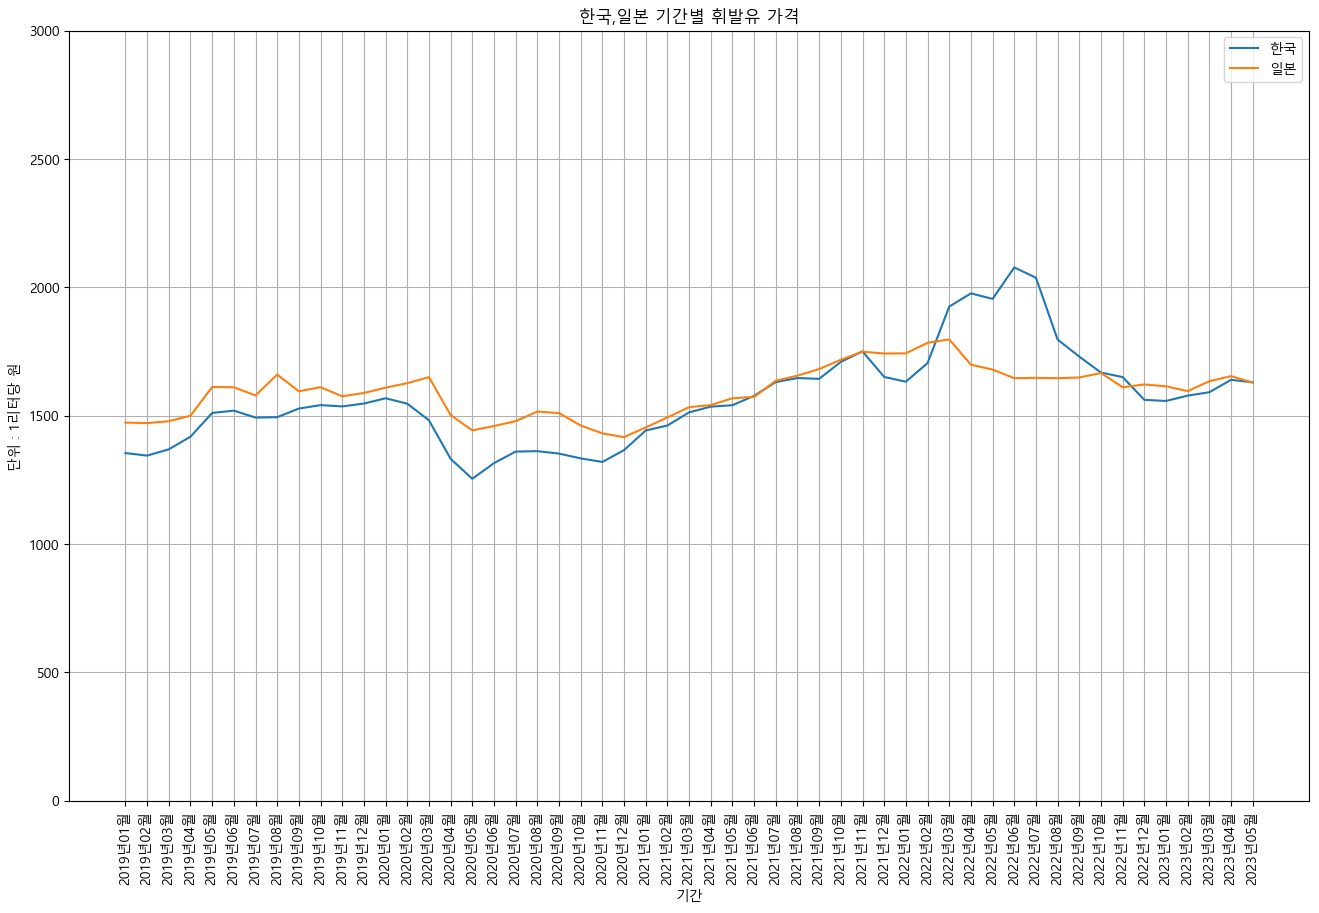

In [10]:
# 한국, 일본 기간별 휘발유 가격 그래프
plt.figure(figsize=(16,10))
plt.plot(g_new['기간'],g_new['한국'])
plt.plot(g_new['기간'],g_new['일본'])
plt.xticks(rotation=90)
plt.grid()
plt.title('한국,일본 기간별 휘발유 가격')
plt.xlabel('기간')
plt.ylabel('단위 : 1리터당 원')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
plt.legend(['한국','일본'])
plt.show()

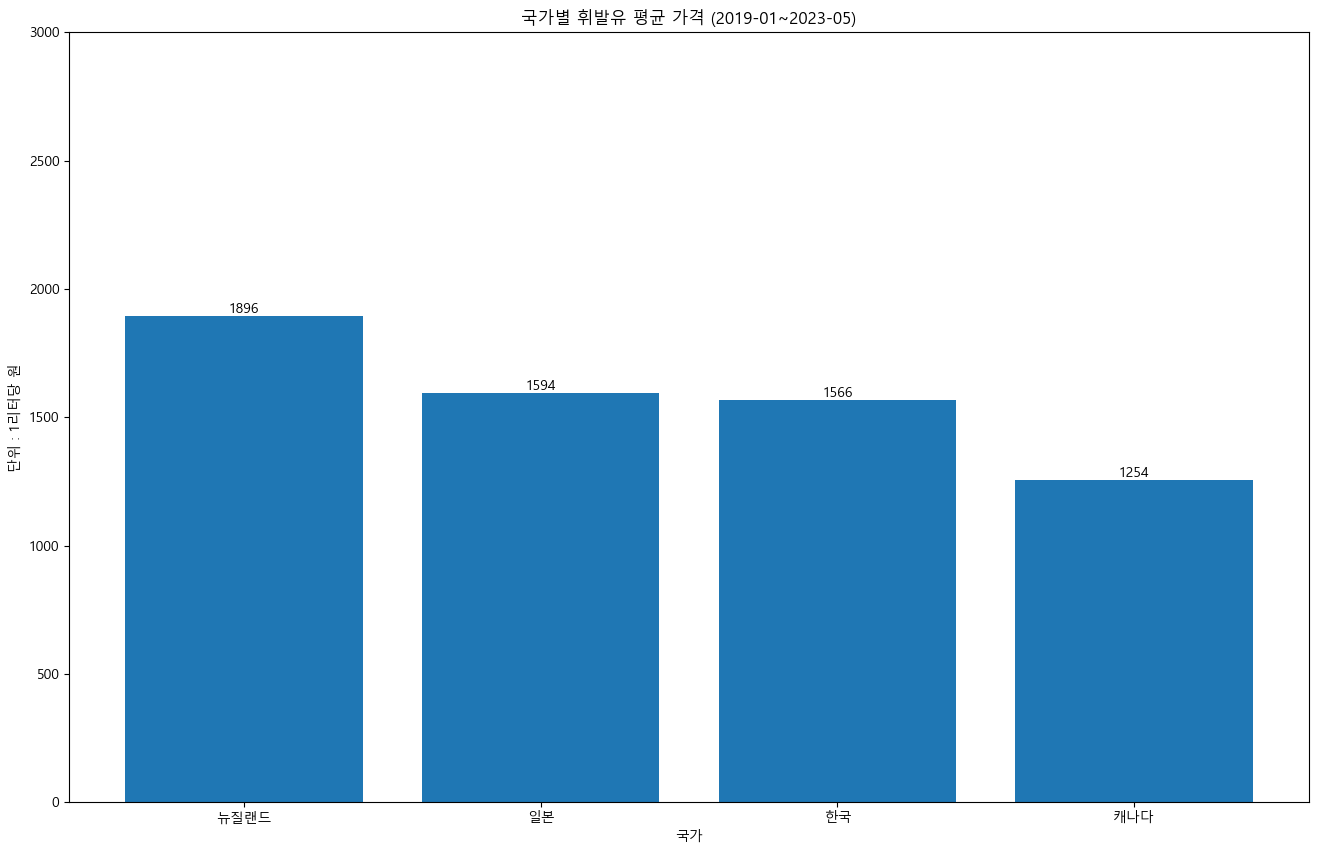

In [32]:
g_new_mean = g_new.iloc[:,1:-2].mean()
g_new_mean.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(16,10))
x = []
y = []
for i in range(len(g_new_mean)):
    #print(exp_g_mean.index[i], exp_g_mean.values[i])
    x.append(g_new_mean.index[i])
    y.append(g_new_mean.values[i].astype(int))
plt.bar(x,y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],horizontalalignment='center', verticalalignment='bottom')
plt.title('국가별 휘발유 평균 가격 (2019-01~2023-05)')
plt.xlabel('국가')
plt.ylabel('단위 : 1리터당 원')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
plt.xticks()
plt.show()

In [24]:
# 기간 및 국가별 경유 가격 csv 파일 읽어들이기
d = pd.read_csv('./국가별_유종별_가격/국가별_월별_자동차용경유_가격_세후.csv',encoding='euc-kr')

In [25]:
# 국가 컬럼의 값을 int타입으로 변경
for i in d.columns[1:]:
    d[i] = d[i].astype("int64")

In [26]:
# 기간 컬럼에서 연도와 월의 값을 추출하여 연도, 월 컬럼에 넣는다.
d['연도'] = d['기간'].str[:4]
d['월'] = d['기간'].str[5:7]

In [28]:
# 2019년 1월부터 2023년 5월까지 데이터를 d_new에 넣는다.
d_new = d.iloc[68:,:].reset_index(drop=True).copy()

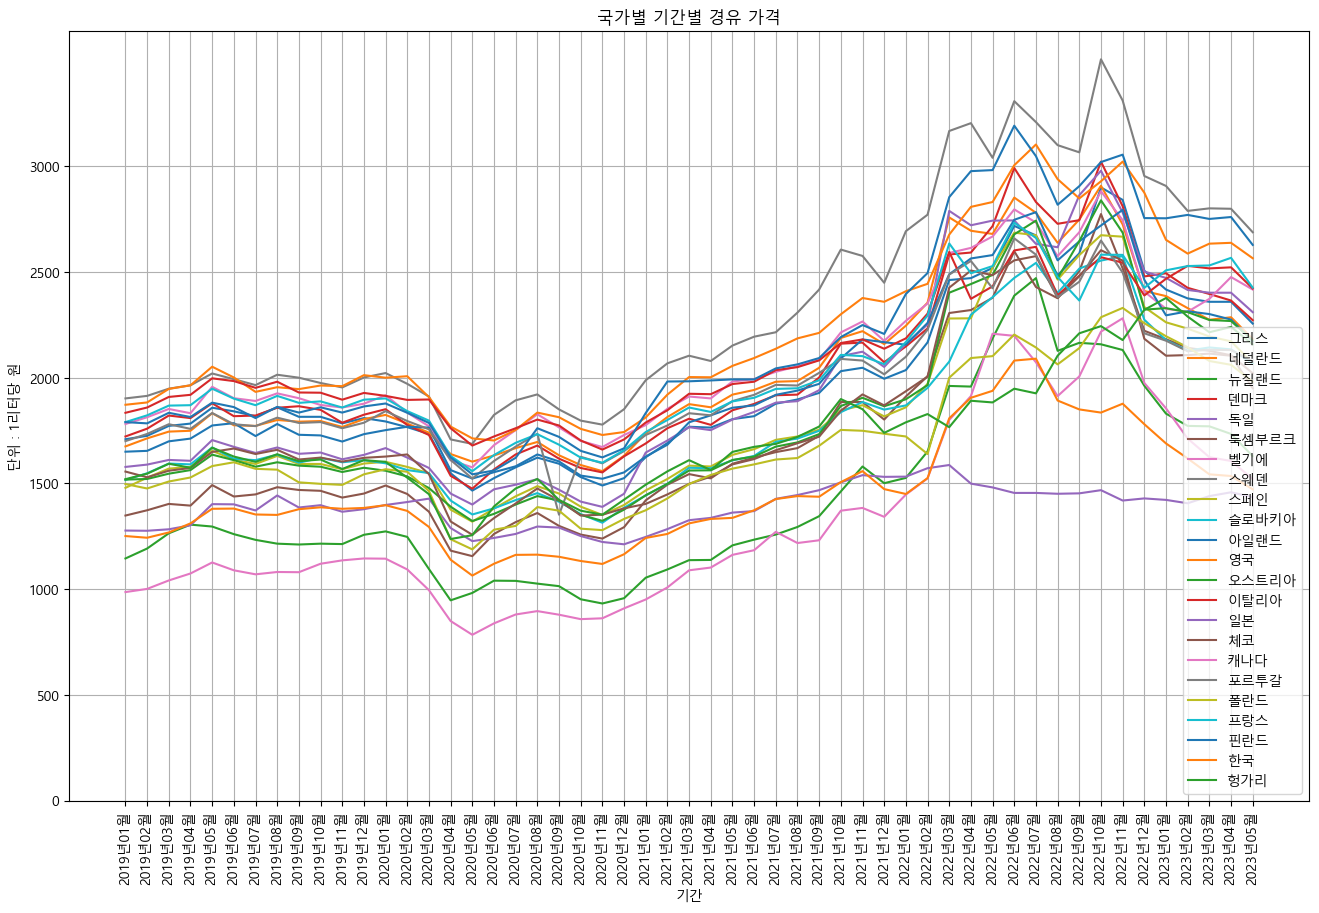

In [29]:
# 국가별 월별 경유 가격 그래프
plt.figure(figsize=(16,10))
for i in d_new.columns[1:-2]:
    plt.plot(d_new['기간'],d_new[i])
plt.xticks(rotation=90)
plt.grid()
plt.title('국가별 기간별 경유 가격')
plt.xlabel('기간')
plt.ylabel('단위 : 1리터당 원')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
plt.legend(d_new.columns[1:])
plt.show()

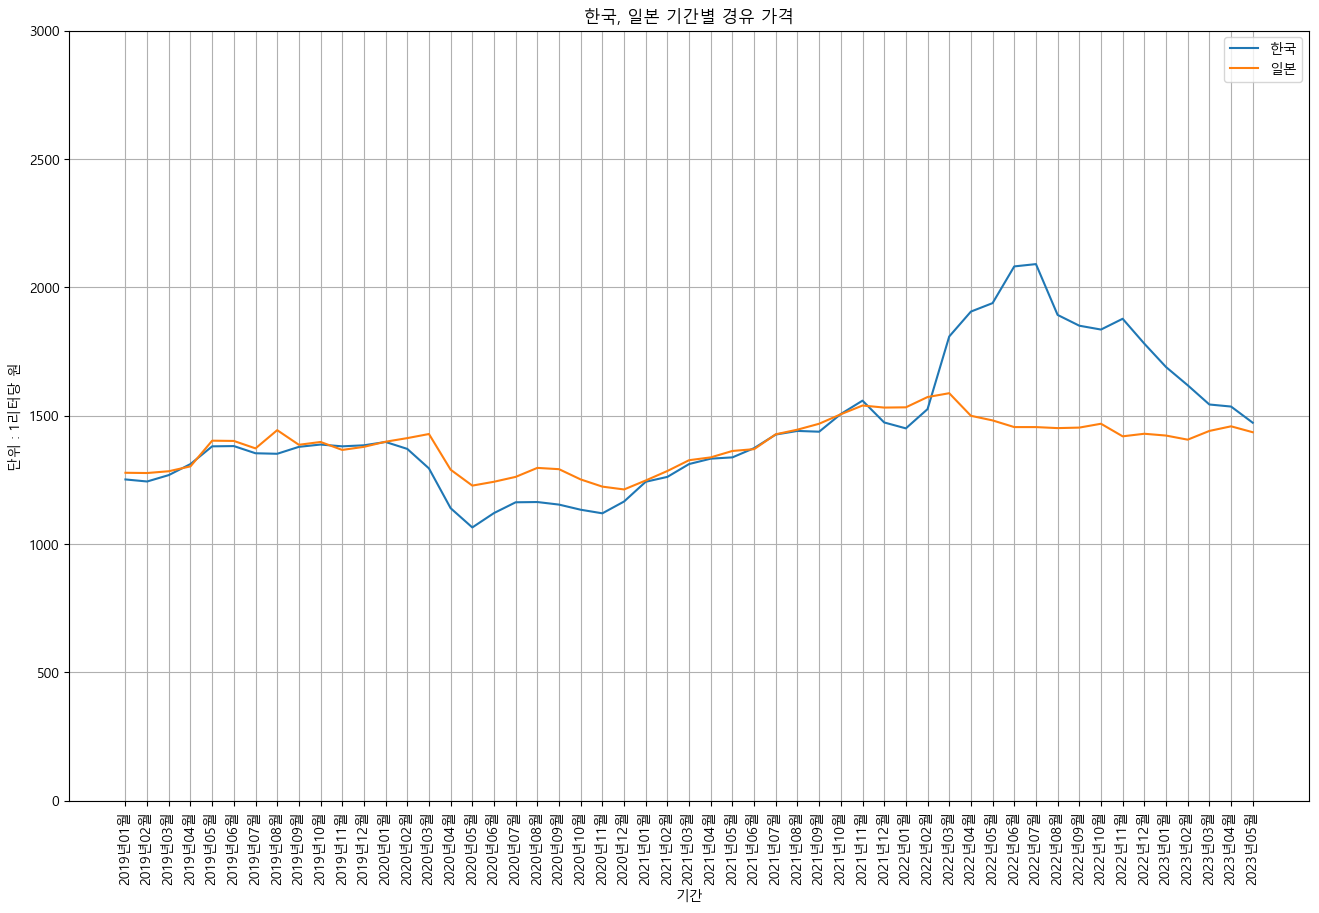

In [30]:
# 한국, 일본 기간별 경유 가격 그래프
plt.figure(figsize=(16,10))
plt.plot(d_new['기간'],d_new['한국'])
plt.plot(d_new['기간'],d_new['일본'])
plt.xticks(rotation=90)
plt.grid()
plt.title('한국, 일본 기간별 경유 가격')
plt.xlabel('기간')
plt.ylabel('단위 : 1리터당 원')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
plt.legend(['한국','일본'])
plt.show()

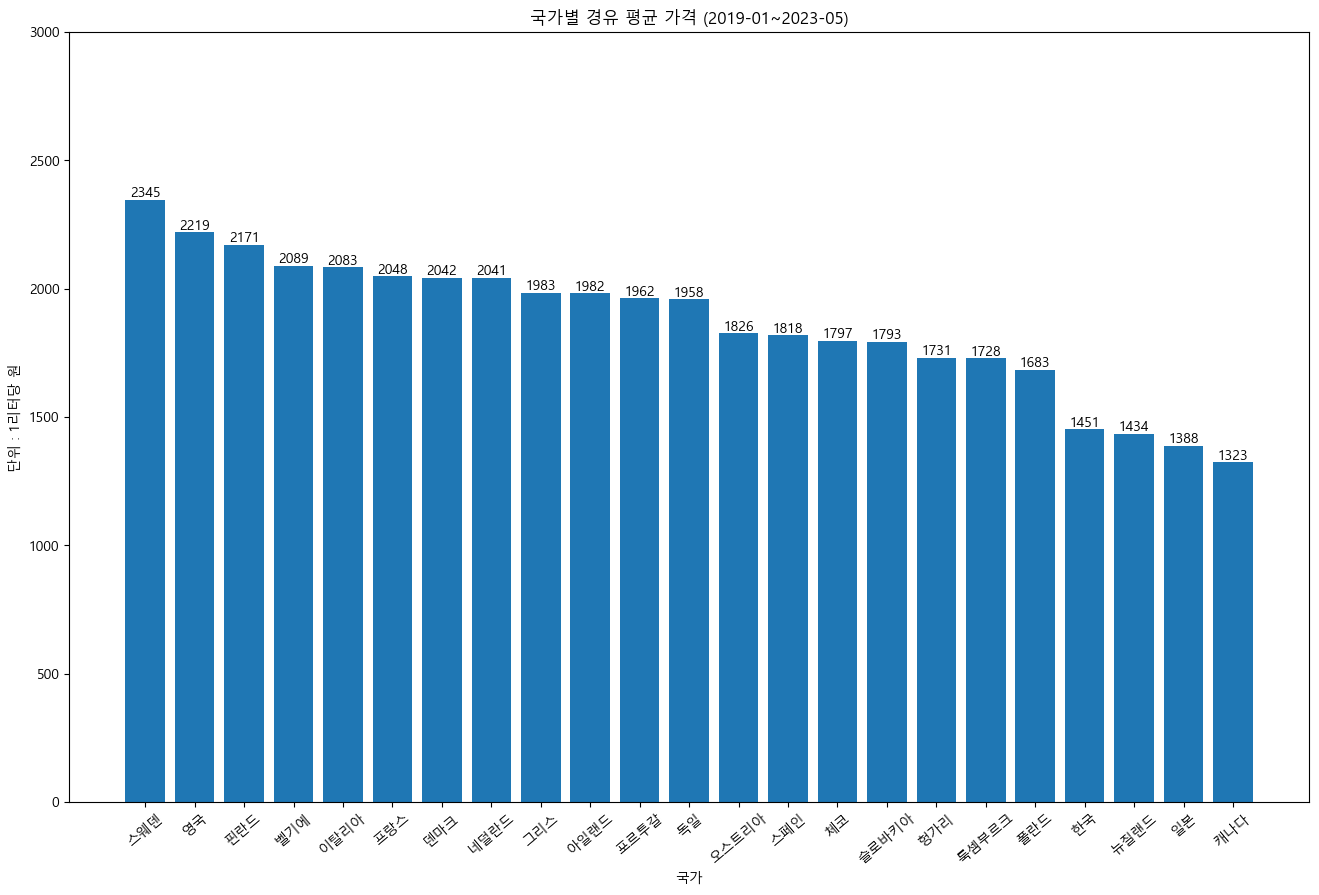

In [31]:
# 국가별 기간 평균 경유 가격
d_new_mean = d_new.iloc[:,1:-2].mean()
d_new_mean.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(16,10))
x = []
y = []
for i in range(len(d_new_mean)):
    #print(exp_g_mean.index[i], exp_g_mean.values[i])
    x.append(d_new_mean.index[i])
    y.append(d_new_mean.values[i].astype(int))
plt.bar(x,y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],horizontalalignment='center', verticalalignment='bottom')
plt.title('국가별 경유 평균 가격 (2019-01~2023-05)')
plt.xlabel('국가')
plt.ylabel('단위 : 1리터당 원')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
plt.xticks(rotation=40)
plt.show()